Getting started
======

Welcome to using Underworld! 
-----

[_Underworld 2_](http://www.underworldcode.org) is a python-friendly version of the Underworld code which provides a programmable and flexible front end to all the functionality of the code running in a parallel HPC environment. This gives signficant advantages to the user, with access to the power of python libraries for setup of complex problems, analysis at runtime, problem steering, and coupling of multiple problems. The python toolkit was funded by the NeCTAR [eResearch_tools](http://www.nectar.org.au/eresearch-tools) program.

Underworld uses python and Jupyter (IPython) notebooks to provide a user-friendly front end. This allows an interactive approach to building up models, where cells can be run in any order while developing. It also allows visualisation on the fly with gLucifer. Notebooks are used to provide tutorials and user guides to users wanting to learn how to use Underworld. Publications based on Underworld, or replicating models used in the literature, are also included in notebook form. We encourage users to contact us if/when they wish to make available their own notebooks associated with their publications.

Underworld only requires basic knowledge of python; constructs such as lists, tuples, modules, for loops, printing and simple functions. This guide covers the basics of how to load modules for Underworld and how to use Jupyter (IPython) notebooks. A short overview of a typical Underworld model with gLucifer plots is given at the end of this guide.

This guide is the first of a series of user guides, designed to be series of "how-to" reference notebooks. These are designed so that a user who understands all of the concepts covered in the user guides will be an advanced user. For users interested in getting set up as quickly as possible on particular examples we refer then to the tutorials notebooks and to use these guides as reference when particular concepts are unclear.

**More information**

1. If using the notebook interactively see the **Help** menu bar.
2. Information on what the notebooks are and how to setup/run them is found [here](http://jupyter-notebook-beginner-guide.readthedocs.org/en/latest/)
3. Basics of how to edit and write in the notebook environment is found [here](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb)

**Keywords:** import, IPython notebooks

Installation
----

This guide assumes that you have already installed Underworld. Details on how to install Underworld is found on the project github page:
https://github.com/underworldcode/underworld2

Running
----

Run the following cell (either the ``run button`` on the menu above or press ``shift+enter``) to load the modules that make up and are used by underworld. 

In [1]:
import underworld as uw

If you have encountered errors then check which packages are missing and see the github page for [underworld](https://github.com/underworldcode/underworld2) for more information.

When using notebooks **interactively** in the Jupyter IPython environment, cells can be run in any order by either using ``shift+enter`` or the run button. You can also run all above or below a particular cell, or all in the entire notebook (in order) by using the ``Cell`` menu item.

How to get help
----

If you need help on individual functions first try the ``help(functionName)``. Most functions in python and Underworld have instructions that can be accessed via the help function.

If you encounter a bug with Underworld please use the [issue tracker on github](https://github.com/underworldcode/underworld2/issues).

In [2]:
help(uw)

Help on package underworld:

NAME
    underworld - Underworld-II is a python-friendly version of the Underworld geodynamics code which provides a programmable and flexible front end to all the functionality of the code running in a parallel HPC environment. This gives signficant advantages to the user, with access to the power of python libraries for setup of complex problems, analysis at runtime, problem steering, and coupling of multiple problems. Underworld2 is integrated with the literate programming environment of the jupyter notebook system for tutorials and as a teaching tool for solid Earth geoscience.

FILE
    /home/gareth/uw2/underworld/__init__.py

DESCRIPTION
    Underworld is an open-source, particle-in-cell finite element code tuned for large-scale geodynamics simulations. The numerical algorithms allow the tracking of history information through the high-strain deformation associated with fluid flow (for example, transport of the stress tensor in a viscoelastic, convect

Quick help information in the form of a pop-up window can be obtained using the following:

In [3]:
uw?

Overview of an Underworld model
-----

Here a minimal model is given along with references to the following user guides for more information.

Firstly we make a mesh (see **The Mesh** user guide).

In [4]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1"), 
                                 elementRes  = (8, 8), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (1., 1.))

Secondly we create a finite element (FE) variable on the mesh (see the **FEVariable** user guide)

In [5]:
temperatureField = uw.fevariable.FeVariable( feMesh=mesh, nodeDofCount=1 )

Thirdly we give the FE variable some initial conditions.

In [6]:
for index, coord in enumerate(mesh.data):
    temperatureField.data[index] = coord[1]  # set the temperature to be the vertical (y) coordinate

Finally here we will plot the temperature field using ``gLucifer`` after importing the gLucifer module.


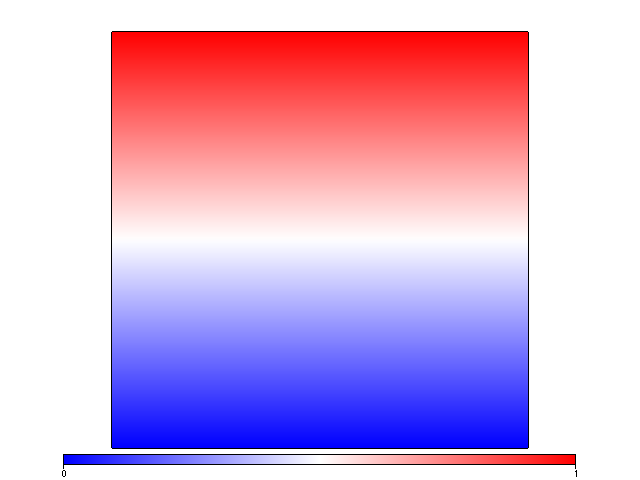

In [7]:
import glucifer
fig = glucifer.Figure()
fig + glucifer.objects.Surface( mesh, temperatureField, colours="blue white red" )
fig + glucifer.objects.Mesh( mesh )
fig.show()

Typically we would then setup boundary conditions, particle swarms, rheology and systems to be solved. Then solve the system as it evolves over time. 

All of these topics are discussed in the following user guides.